<a href="https://colab.research.google.com/github/wz-ml/Day2Night-with-Pix2Pix/blob/master/Day2Night.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Installation:

In [20]:
%tensorflow_version 1.x

TensorFlow 1.x selected.


In [1]:
!wget https://obj.umiacs.umd.edu/dnim/DNIM.tar.gz

--2020-09-02 20:33:31--  https://obj.umiacs.umd.edu/dnim/DNIM.tar.gz
Resolving obj.umiacs.umd.edu (obj.umiacs.umd.edu)... 128.8.122.11
Connecting to obj.umiacs.umd.edu (obj.umiacs.umd.edu)|128.8.122.11|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 117915136 (112M) [binary/octet-stream]
Saving to: ‘DNIM.tar.gz’

DNIM.tar.gz         100%[===================>] 112.45M  51.7MB/s    in 2.2s    

2020-09-02 20:33:34 (51.7 MB/s) - ‘DNIM.tar.gz’ saved [117915136/117915136]



In [2]:
!tar -xzf DNIM.tar.gz

In [3]:
import sys, os
import tqdm
images = []
for path in tqdm.tqdm(os.listdir('/content/DNIM/time_stamp')):
  with open('/content/DNIM/time_stamp/' + path,'r') as reader:
    days, nights = [],[]
    data = reader.readlines()
    for i in data:
      thing = i.split(' ')
      if int(thing[2]) < 4 or int(thing[2]) > 21:
         nights.append(thing[0])
      elif int(thing[2]) > 10 or int(thing[2]) < 15:
         days.append(thing[0])
    images.append([days,nights,str(path)])

100%|██████████| 17/17 [00:00<00:00, 2840.42it/s]


In [4]:
!git clone https://github.com/affinelayer/pix2pix-tensorflow.git

Cloning into 'pix2pix-tensorflow'...
remote: Enumerating objects: 261, done.
remote: Total 261 (delta 0), reused 0 (delta 0), pack-reused 261
Receiving objects: 100% (261/261), 13.33 MiB | 30.07 MiB/s, done.
Resolving deltas: 100% (103/103), done.


In [5]:
cd pix2pix-tensorflow

/content/pix2pix-tensorflow


In [6]:
!python tools/download-dataset.py facades

downloading https://people.eecs.berkeley.edu/~tinghuiz/projects/pix2pix/datasets/facades.tar.gz
extracting
done


In [7]:
import random
import numpy as np
from PIL import Image
from skimage.transform import rescale, resize, downscale_local_mean
from tqdm import trange
import math
data = []

for i in range(len(images)):
  for num in trange(len(images[i][0])*2):
    day = (resize(np.array(Image.open("/content/DNIM/Image/" + images[i][2][:-4] + '/' + random.choice(images[i][0]))),(256,256),anti_aliasing=True))
    night = (resize(np.array(Image.open("/content/DNIM/Image/" + images[i][2][:-4] + '/' + random.choice(images[i][1]))),(256,256),anti_aliasing=True))
    if (np.sum(np.abs(day-night)))/(256*256*3) > 0.15: data.append(np.concatenate((day,night),axis=1))

100%|██████████| 144/144 [00:20<00:00,  7.14it/s]


(256, 512, 3)


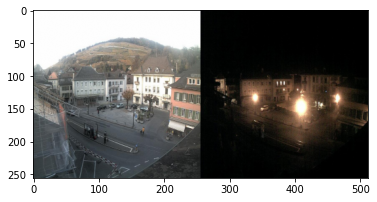

In [8]:
import matplotlib.pyplot as plt
plt.imshow(random.choice(data))
print(random.choice(data).shape)

In [9]:
!mkdir daynight

In [10]:
cd daynight

/content/pix2pix-tensorflow/daynight


In [11]:
!mkdir test
!mkdir train
!mkdir val

In [12]:
from skimage import img_as_ubyte
import cv2

random.shuffle(data)
for index, item in enumerate(tqdm.tqdm(data[:150])):
  cv2.imwrite("test/image%d.png"%index,img_as_ubyte(item))
for index, item in enumerate(tqdm.tqdm(data[150:300])):
  cv2.imwrite("val/image%d.png"%index,img_as_ubyte(item))
for index, item in enumerate(tqdm.tqdm(data[300:1610])):
  cv2.imwrite("train/image%d.png"%index,img_as_ubyte(item))

100%|██████████| 1310/1310 [00:13<00:00, 96.10it/s]


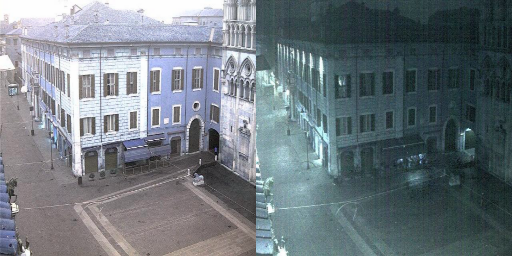

In [13]:
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True
Image.open('/content/pix2pix-tensorflow/daynight/train/image%d.png'%random.randint(0,1300))

In [14]:
cd ..

/content/pix2pix-tensorflow


Using the pretrained model:

Before running any code, please download the model folder from [this link](https://drive.google.com/drive/folders/1-11xDDqG3IK9PJwbLhDczLPaCirHLPzT?usp=sharing).

```
# Please upload the folder to your drive as ('Pix2Pix/daynight_train').
```

In [15]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [23]:
!cp -r /content/gdrive/'My Drive'/Pix2Pix/daynight_train ../pix2pix-tensorflow/daynight_train

In [17]:
!mkdir daynight_test

Alternatively, if you want to train it yourself:
(Skip this step if you used the pretrained model)

In [ ]:
!python pix2pix.py \
  --mode train \
  --output_dir daynight_train \
  --max_epochs 100 \
  --input_dir daynight/train \
  --which_direction BtoA

W0905 00:01:00.634011 139768995350400 deprecation_wrapper.py:119] From pix2pix.py:540: The name tf.set_random_seed is deprecated. Please use tf.compat.v1.set_random_seed instead.

aspect_ratio = 1.0
batch_size = 1
beta1 = 0.5
checkpoint = None
display_freq = 0
flip = True
gan_weight = 1.0
input_dir = daynight/train
l1_weight = 100.0
lab_colorization = False
lr = 0.0002
max_epochs = 100
max_steps = None
mode = train
ndf = 64
ngf = 64
output_dir = daynight_train
output_filetype = png
progress_freq = 50
save_freq = 5000
scale_size = 286
seed = 473555505
separable_conv = False
summary_freq = 100
trace_freq = 0
which_direction = BtoA
W0905 00:01:00.684130 139768995350400 deprecation.py:323] From pix2pix.py:258: string_input_producer (from tensorflow.python.training.input) is deprecated and will be removed in a future version.
Instructions for updating:
Queue-based input pipelines have been replaced by `tf.data`. Use `tf.data.Dataset.from_tensor_slices(string_tensor).shuffle(tf.shape(input_t

KeyboardInterrupt: ignored

Visualization:

In [24]:
# test the model
!python pix2pix.py \
  --mode test \
  --output_dir daynight_test \
  --input_dir daynight/val \
  --checkpoint daynight_train


loaded lab_colorization = False
loaded ndf = 64
loaded ngf = 64
loaded which_direction = BtoA
aspect_ratio = 1.0
batch_size = 1
beta1 = 0.5
checkpoint = daynight_train
display_freq = 0
flip = False
gan_weight = 1.0
input_dir = daynight/val
l1_weight = 100.0
lab_colorization = False
lr = 0.0002
max_epochs = None
max_steps = None
mode = test
ndf = 64
ngf = 64
output_dir = daynight_test
output_filetype = png
progress_freq = 50
save_freq = 5000
scale_size = 256
seed = 860332930
separable_conv = False
summary_freq = 100
trace_freq = 0
which_direction = BtoA
Instructions for updating:
Queue-based input pipelines have been replaced by `tf.data`. Use `tf.data.Dataset.from_tensor_slices(string_tensor).shuffle(tf.shape(input_tensor, out_type=tf.int64)[0]).repeat(num_epochs)`. If `shuffle=False`, omit the `.shuffle(...)`.
Instructions for updating:
Queue-based input pipelines have been replaced by `tf.data`. Use `tf.data.Dataset.from_tensor_slices(input_tensor).shuffle(tf.shape(input_tensor, out

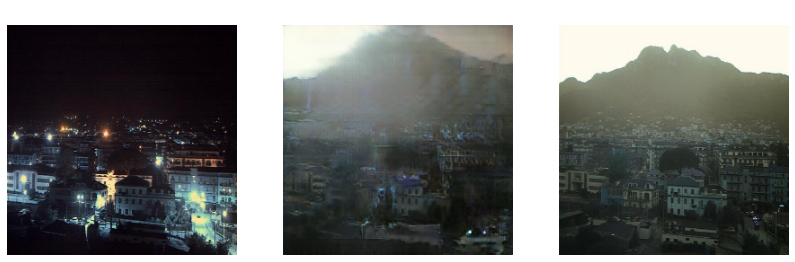

In [36]:
import matplotlib.pyplot as plt
import numpy as np
choice = random.randint(0,150)
path = "/content/pix2pix-tensorflow/daynight_test/images/"
fig = plt.figure(figsize=(14,18))
axarr = fig.subplots(1,3)
[ax.axis('off') for ax in axarr]
axarr[0].imshow(Image.open(path + ('image%d'%choice) + '-inputs.png'))
axarr[0].set_title("Input",size=15,color='white',weight='bold')
axarr[1].imshow(Image.open(path + ('image%d'%choice) + '-outputs.png'))
axarr[1].set_title("Reconstruction",size=15,color='white',weight='bold')
axarr[2].imshow(Image.open(path + ('image%d'%choice) + '-targets.png'))
axarr[2].set_title("Original",size=15,color='white',weight='bold')
plt.show()


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [ ]:
!cp -r daynight_train /content/gdrive/'My Drive'/Pix2Pix

In [ ]:
cd ..

/content/pix2pix-tensorflow


In [ ]:
!mkdir daynight_train

In [ ]:
!cp -r /content/gdrive/'My Drive'/Pix2Pix/daynight_train/* daynight_train 